# Trying with using max over inputs

In [1]:
%load_ext autotime

In [10]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from keras.applications.densenet import DenseNet169
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import metrics

from pathlib import Path
import pickle

time: 6.74 ms


In [3]:
import utils # importing from our utils functions

time: 3.41 s


In [4]:
x_train, y_train, x_test, y_test = utils.read_mura_pickle()

INFO:utils.utils:loading data/MURA-v1.1/x_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/x_valid.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_valid.pkl


time: 11.2 s


In [5]:
x_train.shape

(36808, 256, 256)

time: 2.71 ms


In [6]:
size = x_train.shape[1]

time: 5.53 ms


In [11]:
with Path('./data/MURA-v1.1/train_groups.pkl').open('rb') as pkl_file:
    train_groups = pickle.load(pkl_file)

time: 30.4 ms


In [17]:
n_studies = train_groups.groupby(['body_part', 'patient_id', 'study_id'])[0].count().count()

time: 20.2 ms


In [31]:
train_indices = train_groups.reset_index().groupby(['body_part', 'patient_id', 'study_id'])['index'].min().reset_index().sort_values('index').reset_index(drop=True)

time: 25.7 ms


In [34]:
train_indices.head()

,body_part,patient_id,study_id,index
0,shoulder,1,1,0
1,shoulder,2,1,3
2,shoulder,3,1,6
3,shoulder,4,1,9
4,shoulder,5,1,13


time: 13.1 ms


In [20]:
x_train_study = np.zeros(shape=(n_studies, 256, 256, 4))

time: 1.72 ms


In [36]:
train_indices.iloc[0]['index']

0

time: 5 ms


In [41]:
for i in range(n_studies):
    cur_index = train_indices.iloc[i]['index']
    if i < n_studies - 1:
        next_study_index = train_indices.iloc[i+1]['index']
    else:
        next_study_index = x_train.shape[0]
    for j in range(4):
        if cur_index < next_study_index:
            x_train_study[i, :, :, j] = x_train[cur_index, :, :]
        else:
            break
        cur_index = cur_index + 1

time: 8.84 s


Double checking if images are correct

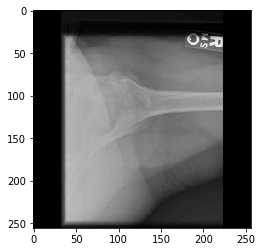

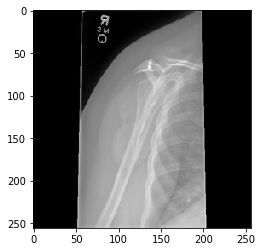

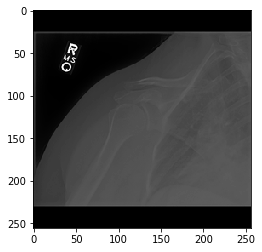

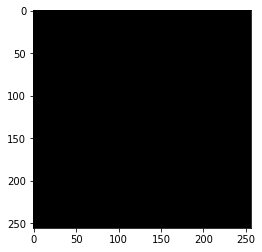

time: 450 ms


In [49]:
for j in range(4):
    plt.imshow(x_train_study[0, :, :, j], cmap='gray')
    plt.show()